# Modules

Esta tabla contiene la información a nivel de fichero (módulo).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('modules')

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions_pct', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point', 'module__expertise_level']
TABLE_TARGET = 'module__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2025-01-13 11:48:37.501029 Data cache files found ...
2025-01-13 11:48:37.510945 Data cache files successfully loaded!!
Features shape: (7939, 14)
Target shape: (7939,)
As we can see the downloaded data contains a total of 7939 instances. Each of the instances corresponds to a program. For each program we have 14 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              7939 non-null   object 
 1   module__has_doc_string               7939 non-null   bool   
 2   module__global_stmts_pct             7939 non-null   float64
 3   module__global_expressions_pct       7939 non-null   float64
 4   module__number_of_classes            7939 non-null   int64  
 5   module__number_of_functions          7939 non-null   int64  
 6   module__class_defs_pct               7939 non-null   float64
 7   module__function_defs_pct            7939 non-null   float64
 8   module__enum_defs_pct                7939 non-null   float64
 9   module__average_stmts_function_body  7939 non-null   float64
 10  module__average_stmts_method_body    7939 non-null   float64
 11  module__type_annotations_pct  

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y dos de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 49.31% instances for BEGINNER class and 50.69% for PROFESSIONAL class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions_pct         0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
module__expertise_level                0
dtype: int64

In [5]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions_pct
------------------------------
0 instancias no tienen un valor para la columna module__global_expressions_pct


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__fu

### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,7939,6,SnakeCase,2886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,7939,2,False,6548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,7939.0,NaN,NaN,NaN,0.274122,0.311558,0.0,0.0,0.153846,0.5,1.0
module__global_expressions_pct,7939.0,NaN,NaN,NaN,0.111588,0.183409,0.0,0.0,0.0,0.166667,1.0
module__number_of_classes,7939.0,NaN,NaN,NaN,0.411513,1.072491,0.0,0.0,0.0,0.0,25.0
module__number_of_functions,7939.0,NaN,NaN,NaN,1.862199,3.96211,0.0,0.0,1.0,2.0,59.0
module__class_defs_pct,7939.0,NaN,NaN,NaN,0.20767,0.386787,0.0,0.0,0.0,0.0,1.0
module__function_defs_pct,7939.0,NaN,NaN,NaN,0.500061,0.486104,0.0,0.0,0.5,1.0,1.0
module__enum_defs_pct,7939.0,NaN,NaN,NaN,0.005583,0.058948,0.0,0.0,0.0,0.0,1.0
module__average_stmts_function_body,7939.0,NaN,NaN,NaN,2.758106,3.966789,0.0,0.0,1.833333,4.416666,43.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "module__number_of_classes": [(0, 0), (1, 1), (2,2), (3,3), (4,inf)],  # min: 0 max: 113
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 258
    "module__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__average_stmts_function_body": [(0.0, 0.0), (0.0, 3.0), (3.0, inf)], #min: 0.0 max: 53.0
    "module__average_stmts_method_body": [(0.0, 0.0), (0.0, 3.0), (3.0, inf)], # min: 0.0 max: 114.0
    "module__global_expressions_pct": [(0,0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__global_stmts_pct": [(0, 0), (0.0, inf)] # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))
print(get_statistics(X_copy, ['module__has_doc_string'], 10))
print(get_statistics(X_copy, ['module__has_entry_point'], 10))
print(get_statistics(X_copy, ['module__name_convention'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct', 'module__global_stmts_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]   5971   75.210984
             [1.0_1.0]   1391   17.521098
             [0.0_1.0)    577    7.267918

module__function_defs_pct  count  percentage
                [0.0_0.0]   3737   47.071420
                [1.0_1.0]   3674   46.277869
                [0.0_1.0)    528    6.650712

module__enum_defs_pct  count  percentage
            [0.0_0.0]   7842   98.778184
            [0.0_inf]     97    1.221816

module__number_of_classes  count  percentage
                    [0_0]   5971   75.210984
                    [1_1]   1410   17.760423
                    [2_2]    293    3.690641
                  [4_inf]    158    1.990175
                    [3_3]    107    1.347777

module__number_of_functions  count  percentage
                    [0_inf]   4202    52.92858
                      [0_0]   3737    47.07142

module__type_annotations_pct  count  percentage
                   [0.0_0.0]   5868   73.9

In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (7939, 20)
Target shape: (7939,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

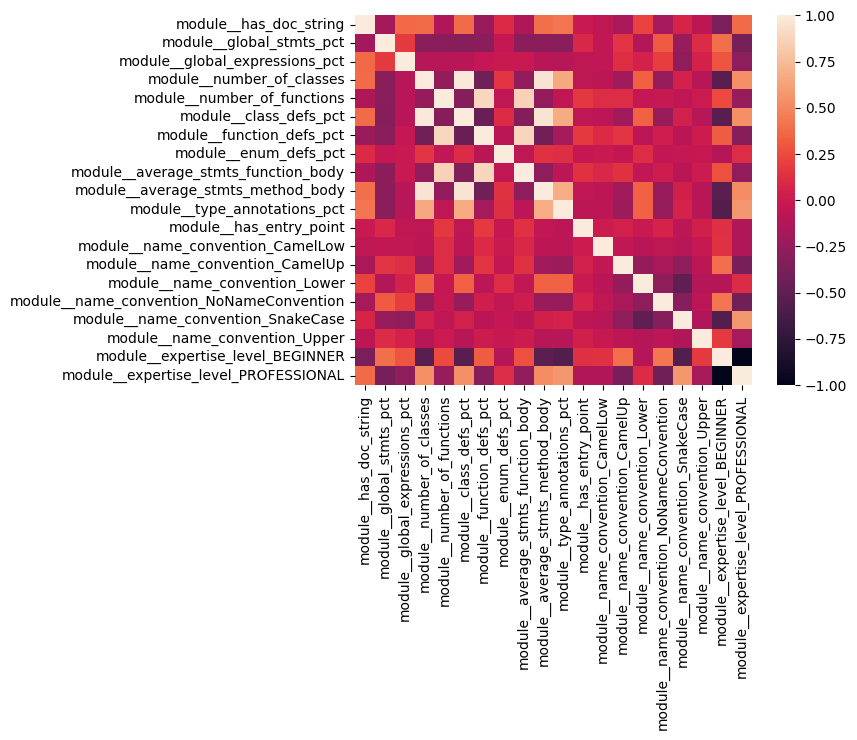

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 13 variable (2 booleanas, 6 porcentuales, 4 numericas y una categorica) se hara un analisis detallado

### Variable has_doc_string (1/13)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

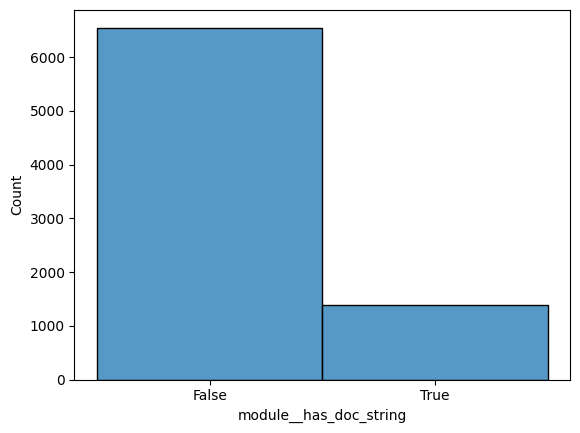

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

In [11]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 1391 valores verdaderos y 6548 valores falsos. Y, la desviación típica es de 0.38017141819000244
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.17521098375110217.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.8247890162488979.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de 0.0 en un 82.48% de los items.
La variable module__has_doc_string toma el valor de 1.0 en un 17.52% de los items.


In [13]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,1391.0,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.00000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.00000,1391.00000
mean,1.0,0.127255,0.196572,0.980590,1.457944,0.504739,0.26707,0.014676,2.012456,2.510462,0.359113,0.049605,0.001438,0.018692,0.526959,0.019410,0.430625,0.002876,0.07908,0.92092
std,0.0,0.181429,0.242108,1.344447,3.778326,0.460579,0.40163,0.089701,3.680120,2.569641,0.287701,0.217205,0.037905,0.135482,0.499452,0.138012,0.495342,0.053567,0.26996,0.26996
min,1.0,0.000000,0.012195,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,1.0,0.000000,0.071429,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000
50%,1.0,0.071429,0.111111,1.000000,0.000000,0.500000,0.00000,0.000000,0.000000,2.375000,0.444444,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.00000
75%,1.0,0.181818,0.200000,1.000000,1.000000,1.000000,0.50000,0.000000,3.500000,4.333333,0.600000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.00000
max,1.0,0.987805,1.000000,11.000000,49.000000,1.000000,1.00000,1.000000,29.666666,17.000000,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


### Variable has_entry_point (2/13)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". 

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

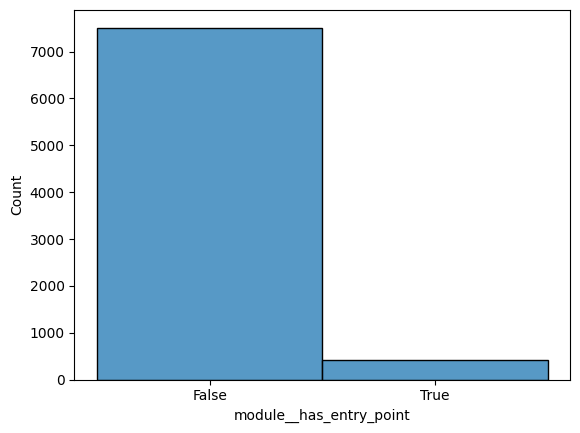

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 428 valores verdaderos y 7511 valores falsos. Y, la desviación típica es de 0.22585634887218475
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.05391107192341605.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.946088928076584.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de 0.0 en un 94.61% de los items.
La variable module__has_entry_point toma el valor de 1.0 en un 5.391% de los items.


In [17]:
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.0,428.000000,428.000000,428.000000,428.0,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.161215,0.285539,0.056233,0.238318,3.355140,0.116611,0.862361,0.0,4.609613,0.915503,0.068538,1.0,0.018692,0.182243,0.282710,0.247664,0.214953,0.053738,0.764019,0.235981
std,0.368159,0.197982,0.097848,0.945458,4.587944,0.305106,0.329860,0.0,5.491184,2.954536,0.188058,0.0,0.135592,0.386496,0.450844,0.432160,0.411271,0.225764,0.425107,0.425107
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.142857,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.787500,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.200000,0.000000,0.000000,2.000000,0.000000,1.000000,0.0,3.571429,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.407252,0.100000,0.000000,4.000000,0.000000,1.000000,0.0,5.500000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.500000,11.000000,27.000000,1.000000,1.000000,0.0,41.000000,22.555555,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_classes (3/13)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 25. Con una media de 0,411.

<Axes: ylabel='module__number_of_classes'>

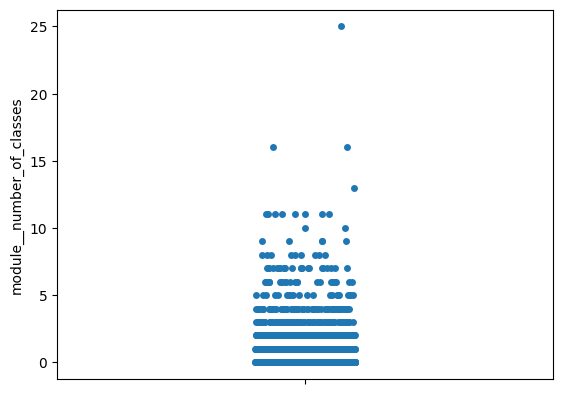

In [18]:
sns.stripplot(X['module__number_of_classes'])

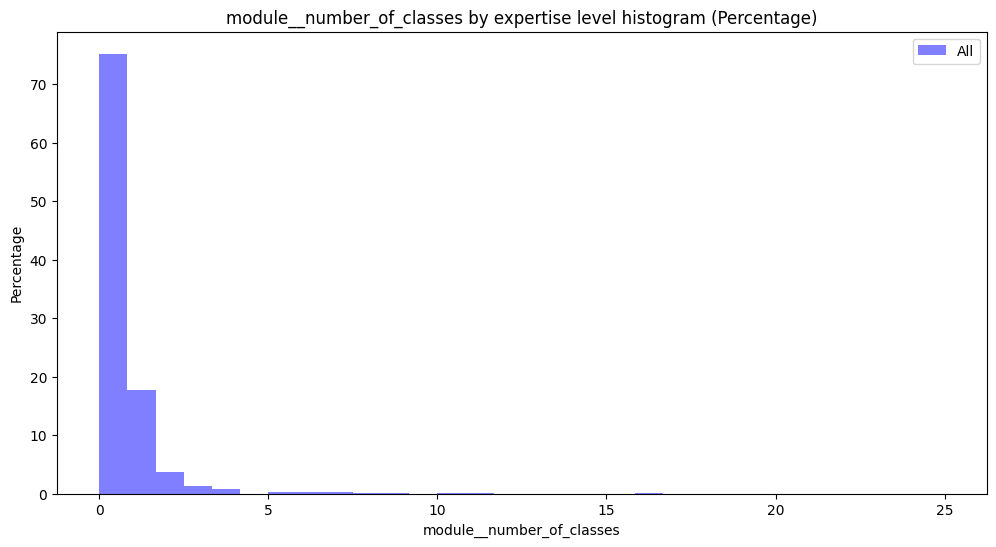

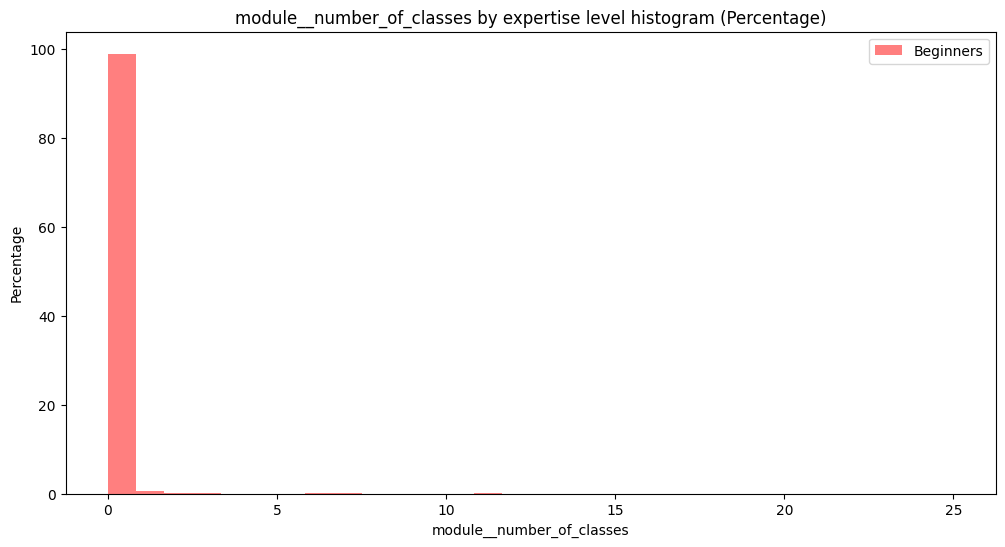

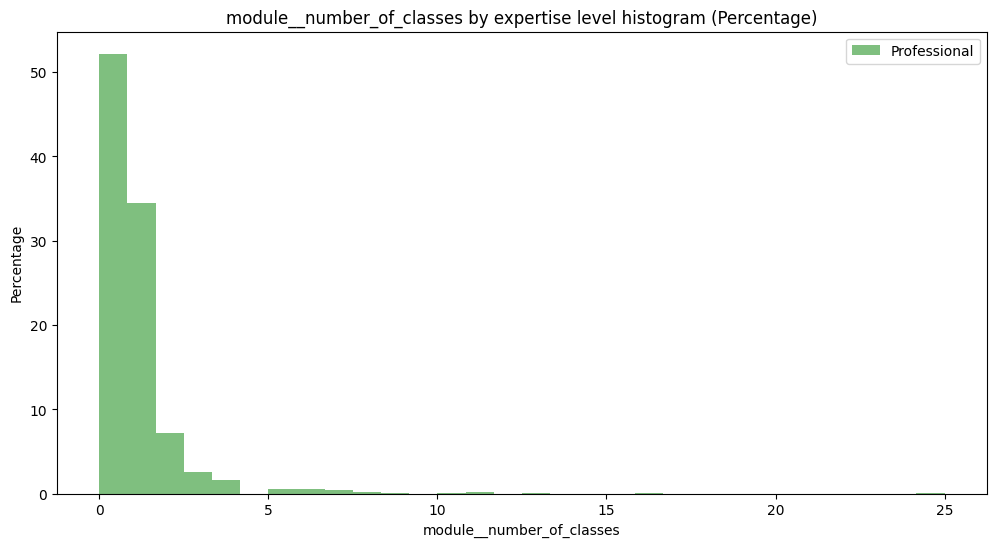

In [19]:
print_histogram(X, 'module__number_of_classes', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__number_of_classes', 'module__expertise_level', bins=30, include_all=False, include_experts=False, include_beginners=True)
print_histogram(X, 'module__number_of_classes', 'module__expertise_level', bins=30, include_all=False, include_experts=True, include_beginners=False)

In [68]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.799920751581616
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a 0.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a 0.0 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 1968 instancias tienen un valor para module__number_of_classes superior a 0.0 (Q3+1.5*IQR) para module__number_of_classes. Representando un 24.79% del total de instancias.
+3.0IQR: 1968 instancias tienen un valor para module__number_of_classes superior a 0.0 (Q3-3*IQR) para module__number_of_classes. Representando un 24.79% del total de instancias.
L: 0 instancias tienen un valor para module__number_of_c

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 76 (Con un MC de 79 usamos U)

In [21]:
X[X['module__number_of_classes'] > 76.8].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE

Hay dos modulos con más de 96 clases.

### Variable number_of_functions (4/13)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 59. Con una media de 1,862.

<Axes: ylabel='module__number_of_functions'>

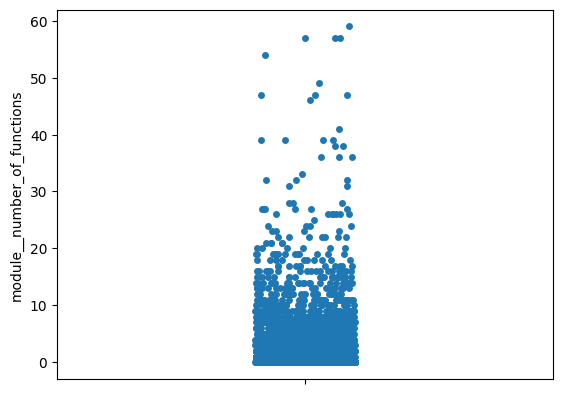

In [22]:
sns.stripplot(X['module__number_of_functions'])

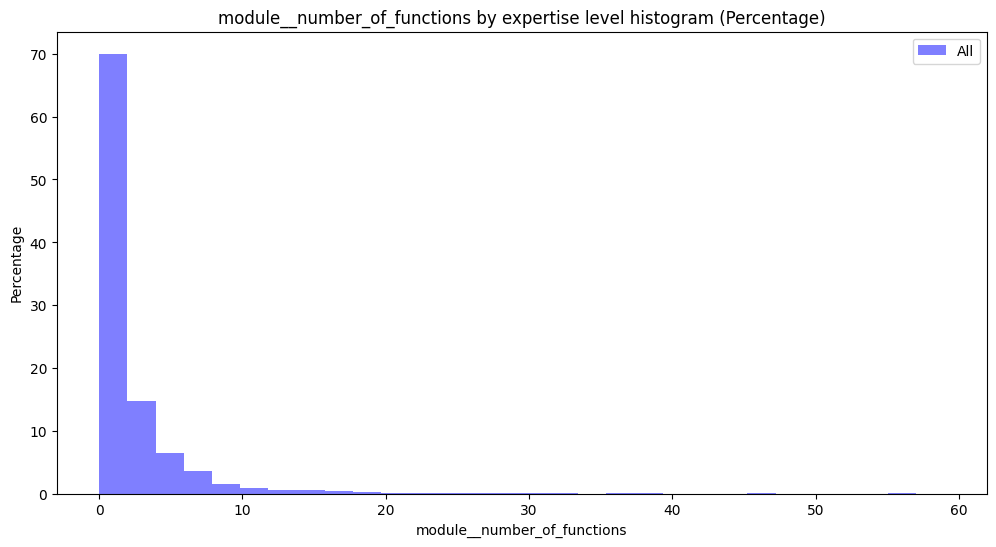

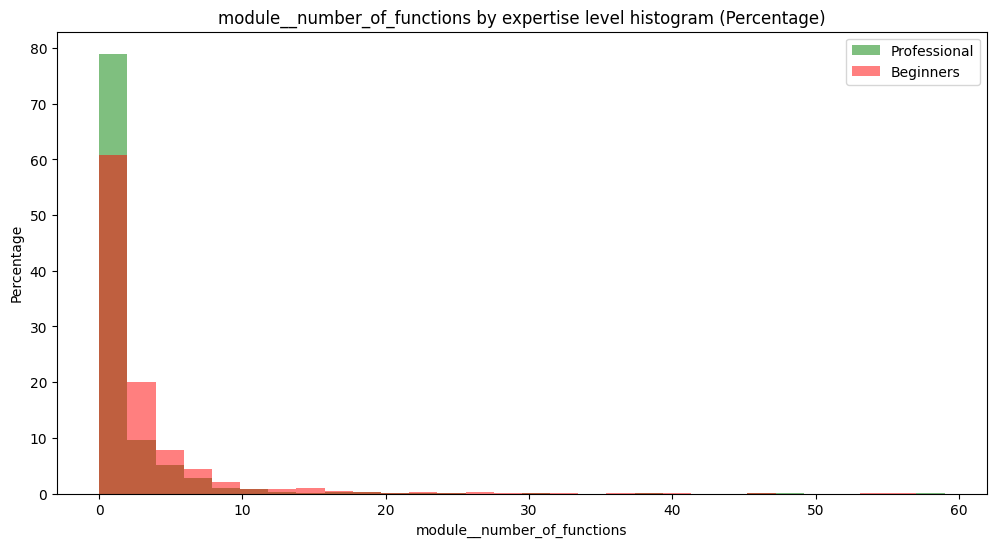

In [23]:
print_histogram(X, 'module__number_of_functions', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__number_of_functions', 'module__expertise_level', bins=30, include_all=False)

In [24]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9344584175080293
Rango valores atípicos extremos (Tukey): [-6.0,8.0]
Rango valores atípicos leves (Tukey): [-3.0,5.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.11395038181067706,128.02067221595257]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -6.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -3.0 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 691 instancias tienen un valor para module__number_of_functions superior a 5.0 (Q3+1.5*IQR) para module__number_of_functions. Representando un 8.704% del total de instancias.
+3.0IQR: 330 instancias tienen un valor para module__number_of_functions superior a 8.0 (Q3-3*IQR) para module__number_of_functions. Representando un 4.157% del total de instancias.
L: 0 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 128 (Con un MC de 93 usamos U)

In [25]:
X[X['module__number_of_functions'] > 128].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable average_stmts_function_body (5/13)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 43. Con una media de 2.758.

<Axes: ylabel='module__average_stmts_function_body'>

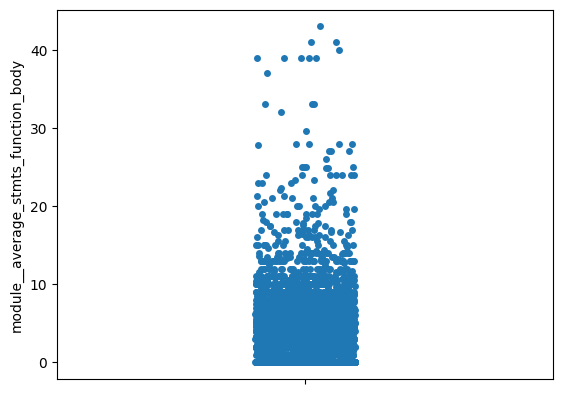

In [26]:
sns.stripplot(X['module__average_stmts_function_body'])

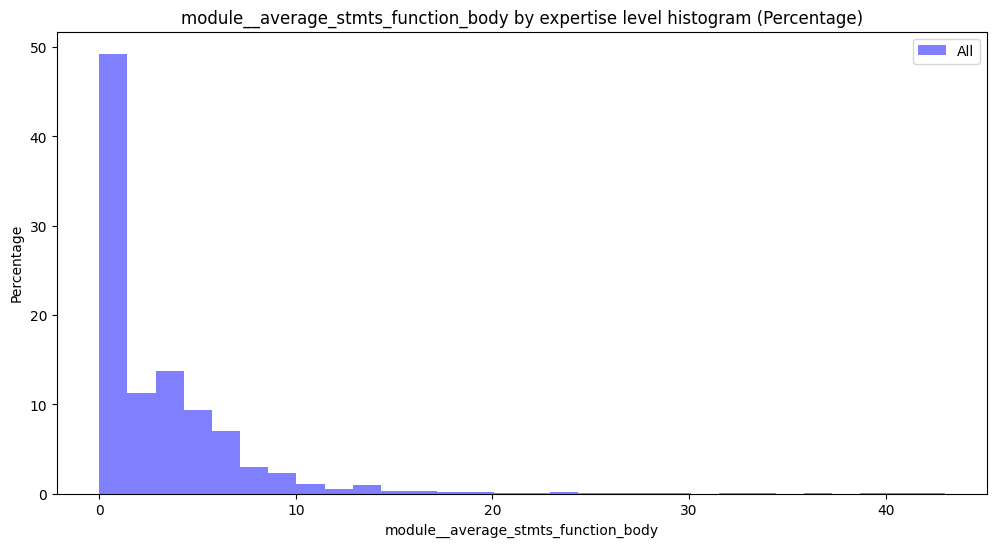

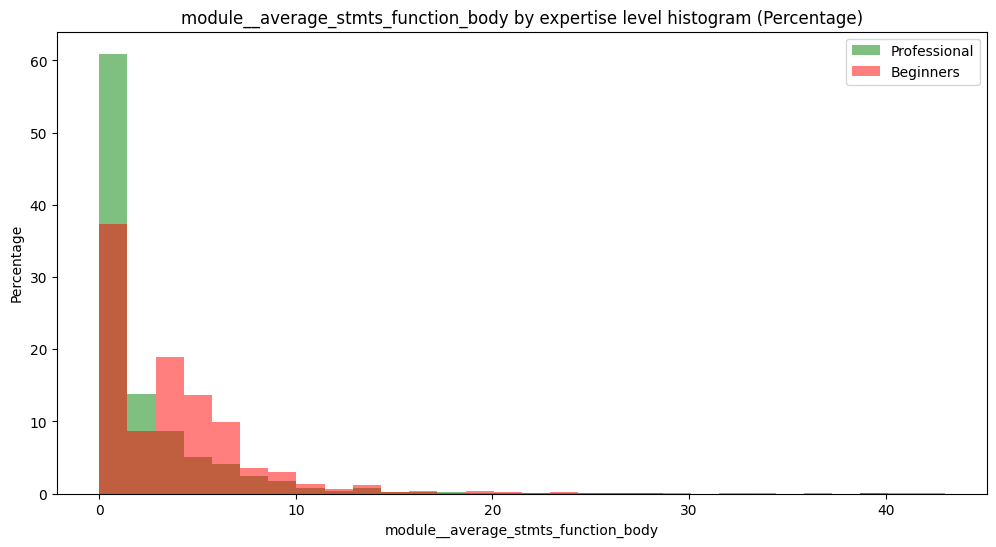

In [27]:
print_histogram(X, 'module__average_stmts_function_body', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__average_stmts_function_body', 'module__expertise_level', bins=30, include_all=False)

In [28]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5574263498348164
Rango valores atípicos extremos (Tukey): [-13.249999523162842,17.66666603088379]
Rango valores atípicos leves (Tukey): [-6.624999761581421,11.041666269302368]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.9416309174716359,66.0101289192186]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -13.249999523162842 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -6.624999761581421 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 250 instancias tienen un valor para module__average_stmts_function_body superior a 11.041666269302368 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 3.149% del total de instancias.
+3.0IQR: 80 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17.6 (Con un MC de 57 usamos Tuckey)

In [29]:
X[X['module__average_stmts_function_body'] > 17.6].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.137500,0.096417,0.080928,0.387500,2.262500,0.050498,0.949502,0.0,24.850529,0.314524,0.078167,0.150000,0.05000,0.125000,0.262500,0.175000,0.32500,0.062500,0.650000,0.350000
std,0.346547,0.162675,0.140512,1.775314,2.745508,0.167061,0.167061,0.0,6.787471,1.801087,0.191284,0.359324,0.21932,0.332805,0.442769,0.382364,0.47133,0.243589,0.479979,0.479979
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.0,17.833334,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,19.909091,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,23.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,0.000000,0.114583,0.111111,0.000000,2.000000,0.000000,1.000000,0.0,27.200000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000
max,1.000000,0.600000,0.500000,11.000000,12.000000,0.750000,1.000000,0.0,43.000000,14.928572,0.647059,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (6/13)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 28. Con una media de 0.99.

<Axes: ylabel='module__average_stmts_method_body'>

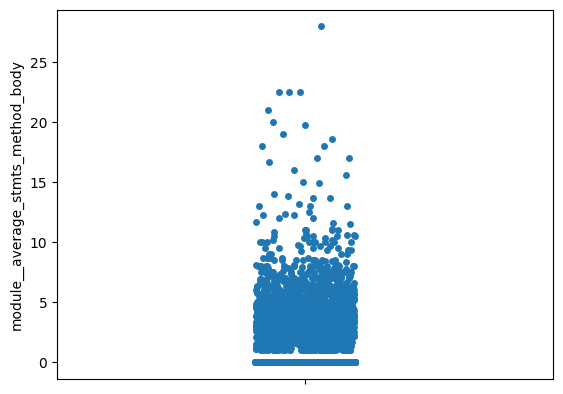

In [30]:
sns.stripplot(X['module__average_stmts_method_body'])

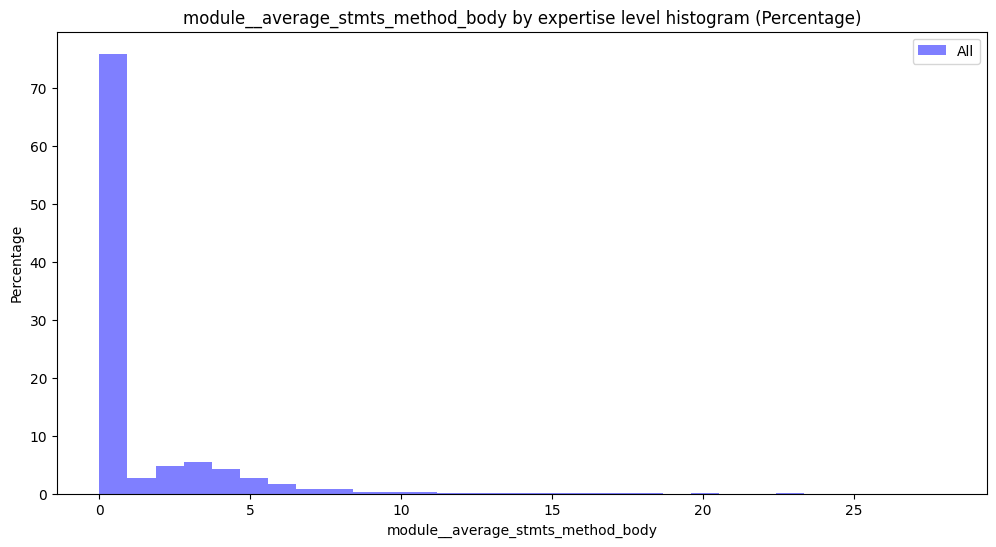

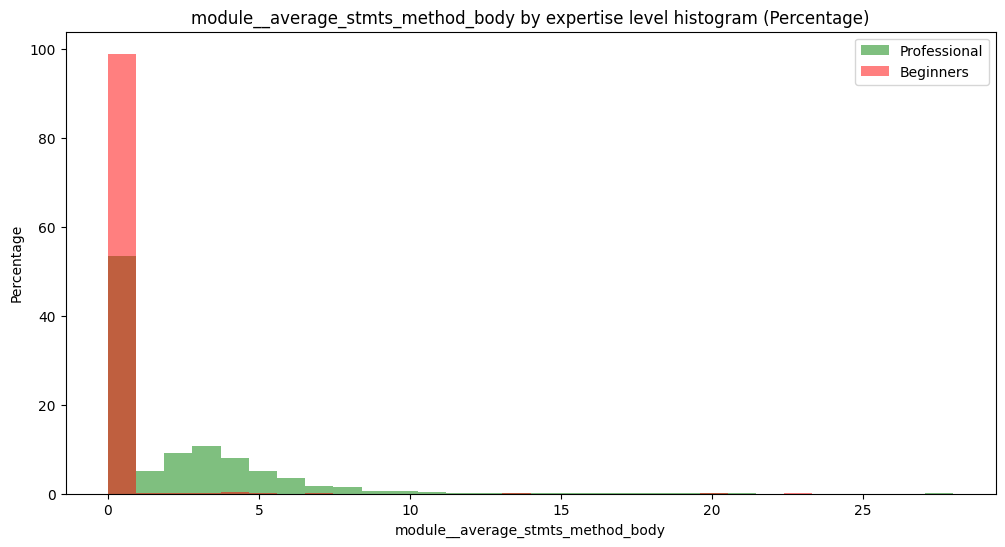

In [31]:
print_histogram(X, 'module__average_stmts_method_body', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__average_stmts_method_body', 'module__expertise_level', bins=30, include_all=False)

### IMPORTANTE
El valor máximo está muy alejados del siguiente.

In [32]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7527866203221476
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a 0.0 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a 0.0 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 1915 instancias tienen un valor para module__average_stmts_method_body superior a 0.0 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 24.12% del total de instancias.
+3.0IQR: 1915 instancias tienen un valor para module__average_stmts_method_body superior a 0.0 (Q3-3*IQR) para module__average_stmts_method_body. Representando un 24.12% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Con un MC de 75 usamos U)

In [69]:
X[X['module__average_stmts_method_body'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.0,1915.000000,1915.000000
mean,0.433420,0.083367,0.049161,1.651175,0.925849,0.841589,0.143220,0.015191,1.257151,4.112190,0.422670,0.030287,0.001044,0.008355,0.585379,0.004178,0.401044,0.0,0.021932,0.978068
std,0.495677,0.118534,0.066593,1.593316,3.115629,0.272711,0.262724,0.083821,2.793123,2.555496,0.250616,0.171421,0.032309,0.091047,0.492785,0.064516,0.490238,0.0,0.146500,0.146500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.666667,0.000000,0.000000,0.000000,2.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.571429,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,1.000000,0.142857,0.090909,2.000000,1.000000,1.000000,0.200000,0.000000,1.000000,5.000000,0.613636,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,1.000000,0.882353,0.500000,25.000000,59.000000,1.000000,0.980000,1.000000,27.000000,28.000000,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### IMPORTANTE
Hay 3 modulos con más de 37 sentencias de media en el cuerpo de los métodos.

### Variable name_convention (7/13)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

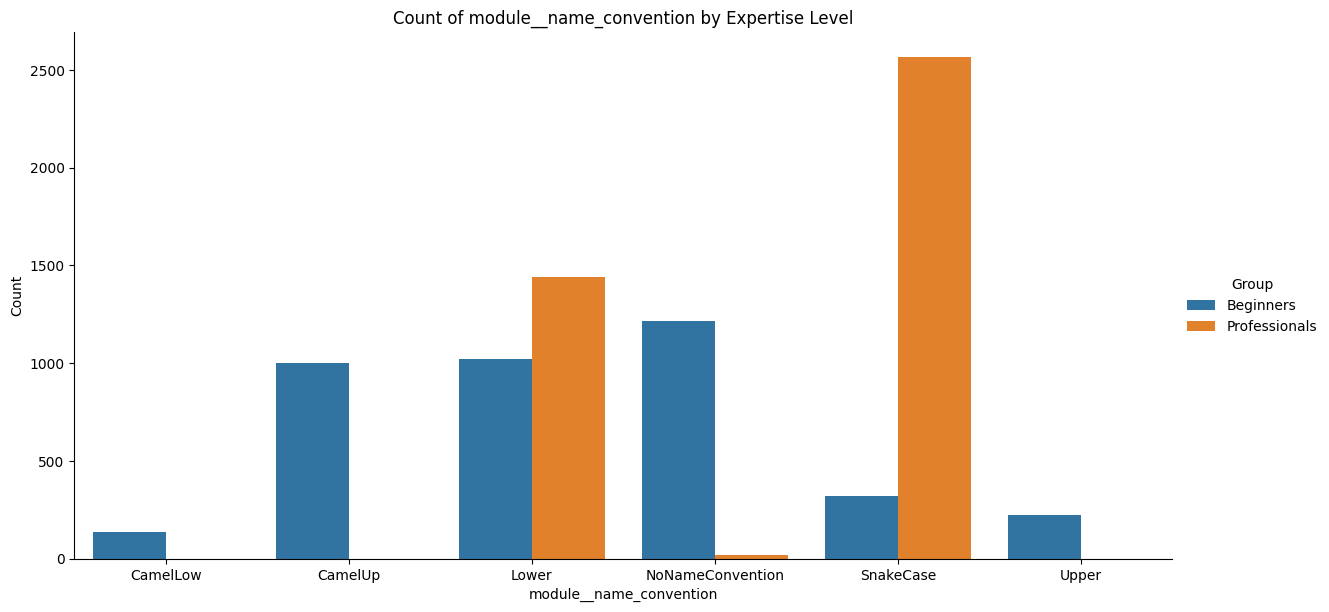

In [70]:
print_categorical_histogram(full_table, 'module__name_convention','module__expertise_level', include_all=False)

In [35]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de SnakeCase en un 36.35% de los items.
La variable module__name_convention toma el valor de Lower en un 31.0% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 15.56% de los items.
La variable module__name_convention toma el valor de CamelUp en un 12.61% de los items.
La variable module__name_convention toma el valor de Upper en un 2.796% de los items.
La variable module__name_convention toma el valor de CamelLow en un 1.688% de los items.


In [36]:
print_values_usage_for_cat_var(full_table, 'module__name_convention', NAMING_CONVENTION_VALUES)

La variable module__name_convention puede tomar 7 valores distintos
	6 (85.71%) valores utilizados
	1 (14.29%) valores NO utilizados
		La variable module__name_convention nunca toma valor Discard.


### Variable global_stmts_pct (8/13)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.227542.

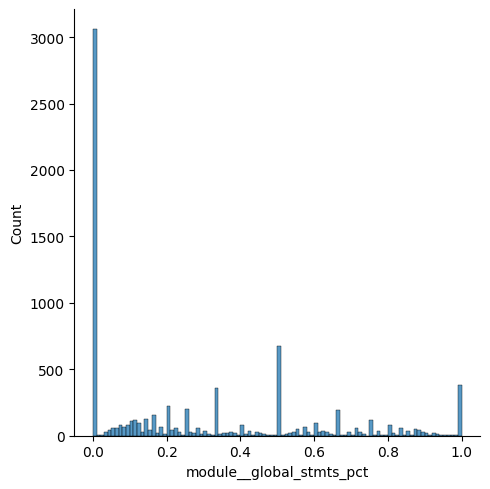

In [37]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

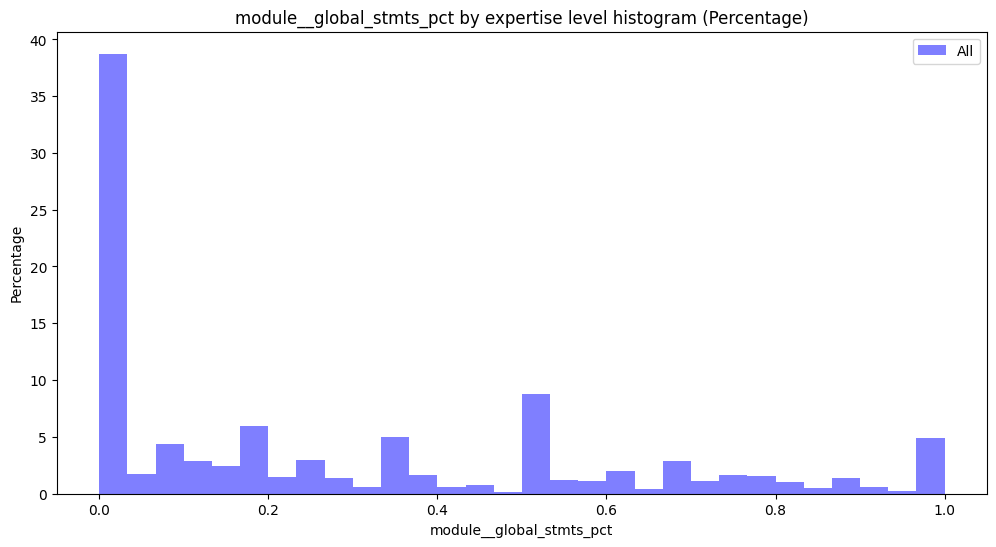

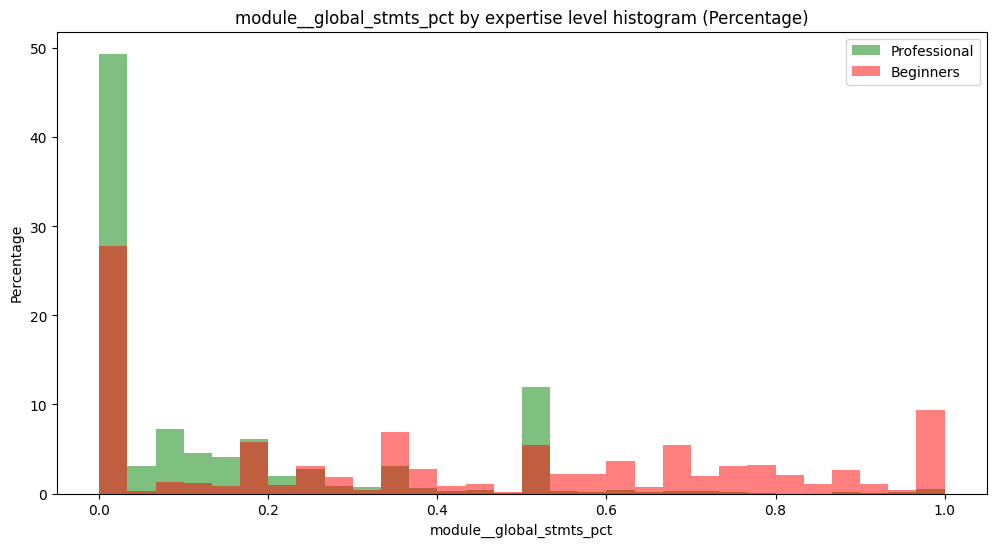

In [38]:
print_histogram(X, 'module__global_stmts_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__global_stmts_pct', 'module__expertise_level', bins=30, include_all=False)

In [39]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.41432034969329834
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.17590639071441605,4.433774219878014]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -1.5 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.75 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.25 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 2.0 (Q3-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2 (Con un MC de 41 usamos Tuckey)

In [71]:
X[X['module__global_stmts_pct'] > 2].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable global_expressions_pct (9/13)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.094516.

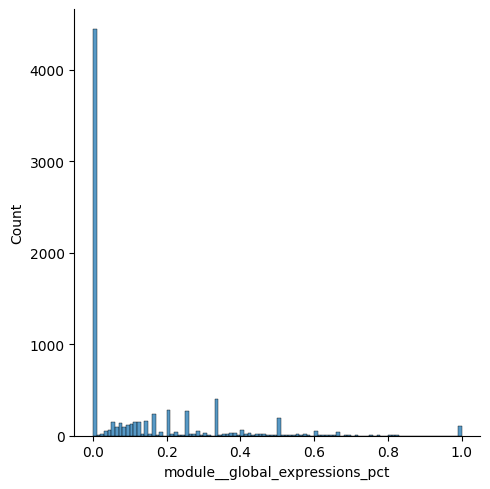

In [41]:
sns.displot(X['module__global_expressions_pct'], bins=[i / 100 for i in range(0, 101)])

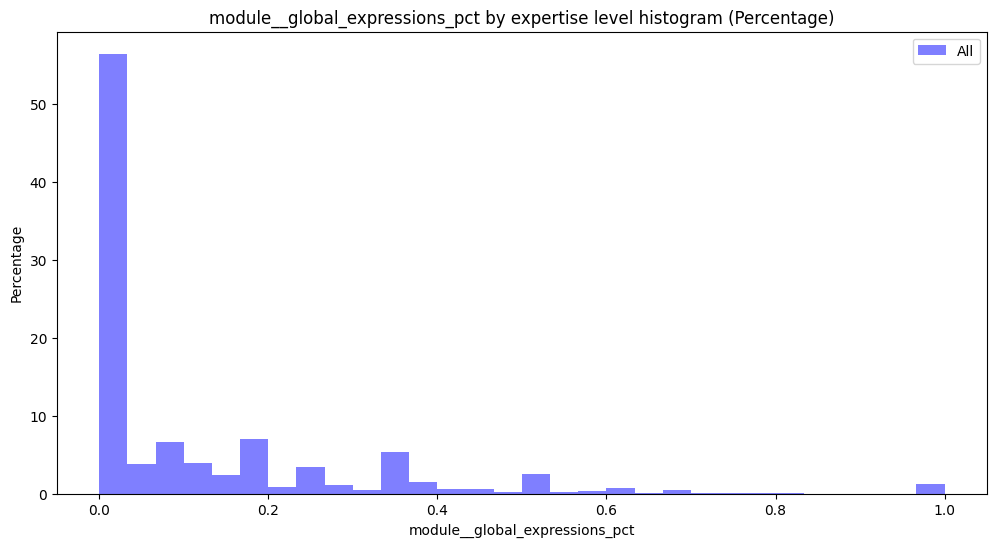

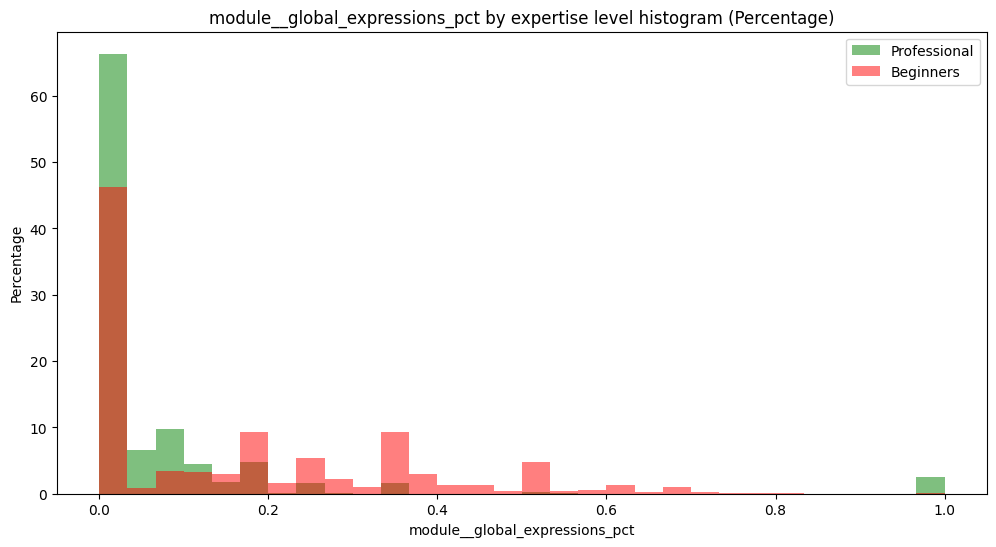

In [42]:
print_histogram(X, 'module__global_expressions_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__global_expressions_pct', 'module__expertise_level', bins=30, include_all=False)

In [43]:
print_outliers_for_df_column(X, 'module__global_expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4774288188743736
Rango valores atípicos extremos (Tukey): [-0.5000000149011612,0.6666666865348816]
Rango valores atípicos leves (Tukey): [-0.2500000074505806,0.416666679084301]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.047014688849893106,1.854458297530483]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.5000000149011612 (Q1-3*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.2500000074505806 (Q1-1.5*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 553 instancias tienen un valor para module__global_expressions_pct superior a 0.416666679084301 (Q3+1.5*IQR) para module__global_expressions_pct. Representando un 6.966% del total de instancias.
+3.0IQR: 126 instancias tienen un valor para module__global_expres

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.66 (Con un MC de 477 usamos Tuckey Extremo)

In [72]:
X[X['module__global_expressions_pct'] > 0.66].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,161.000000,161.000000,161.000000,161.0,161.000000,161.0,161.000000,161.0,161.000000,161.0,161.0,161.0,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.639752,0.051364,0.888675,0.0,0.447205,0.0,0.248447,0.0,1.573203,0.0,0.0,0.0,0.012422,0.074534,0.080745,0.130435,0.639752,0.062112,0.385093,0.614907
std,0.481570,0.097709,0.149554,0.0,1.166730,0.0,0.433461,0.0,3.084606,0.0,0.0,0.0,0.111107,0.263458,0.273294,0.337832,0.481570,0.242112,0.488136,0.488136
min,0.000000,0.000000,0.666667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.692308,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.333333,1.000000,0.0,7.000000,0.0,1.000000,0.0,15.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable class_defs_pct (10/13)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.31924. 

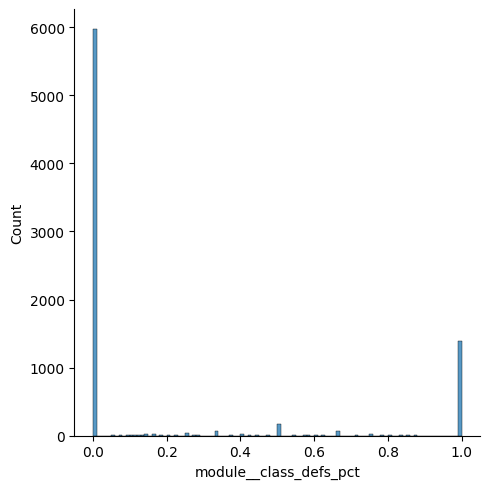

In [46]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

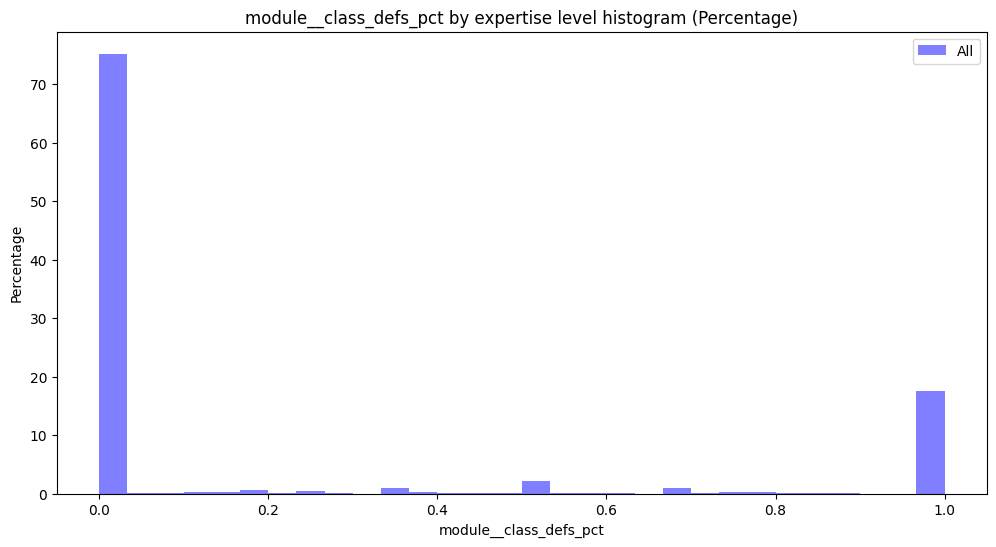

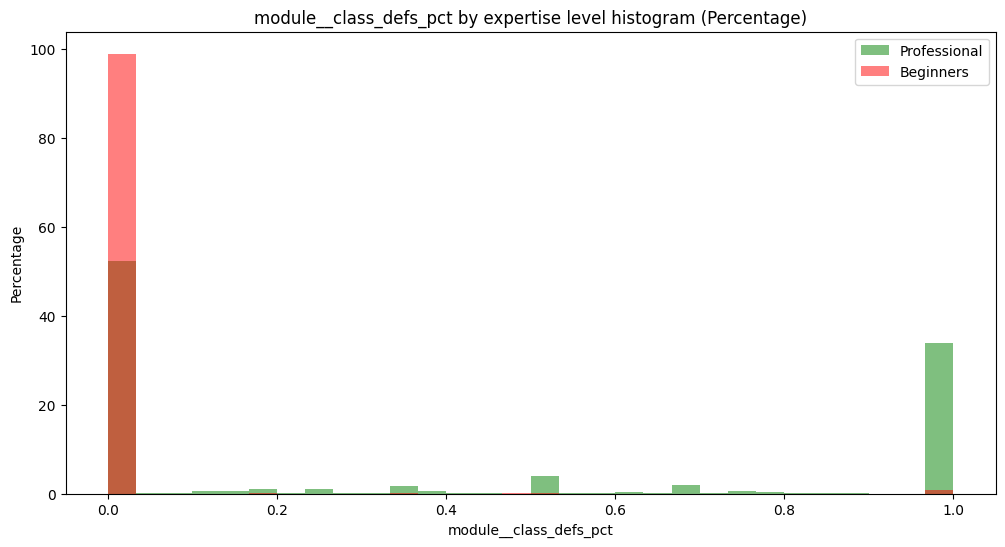

In [47]:
print_histogram(X, 'module__class_defs_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__class_defs_pct', 'module__expertise_level', bins=30, include_all=False)

In [48]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6277088344443982
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a 0.0 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1968 instancias tienen un valor para module__class_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 24.79% del total de instancias.
+3.0IQR: 1968 instancias tienen un valor para module__class_defs_pct superior a 0.0 (Q3-3*IQR) para module__class_defs_pct. Representando un 24.79% del total de instancias.
L: 0 instancias tienen un valor para module__class_defs_pct inferior a 0.0 para

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [49]:
X[(X['module__class_defs_pct'] > 0.0) & (X['module__class_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.0,577.000000,577.000000
mean,0.443674,0.102186,0.036578,2.214905,3.301560,0.446612,0.507594,0.045794,4.505292,4.147374,0.396821,0.034662,0.003466,0.008666,0.495667,0.010399,0.481802,0.0,0.019064,0.980936
std,0.497248,0.121993,0.045088,2.203750,5.107784,0.203490,0.250918,0.130376,3.869906,3.054377,0.255495,0.183081,0.058823,0.092765,0.500415,0.101530,0.500102,0.0,0.136869,0.136869
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.285714,0.333333,0.000000,2.000000,2.250000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.076923,0.013889,1.000000,2.000000,0.500000,0.500000,0.000000,3.833333,3.666667,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,1.000000,0.153846,0.066667,2.000000,4.000000,0.600000,0.666667,0.000000,6.000000,5.222222,0.600000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,1.000000,0.780822,0.292683,25.000000,59.000000,0.888889,0.980000,0.750000,27.000000,22.555555,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable function_defs_pct (11/13)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.458978

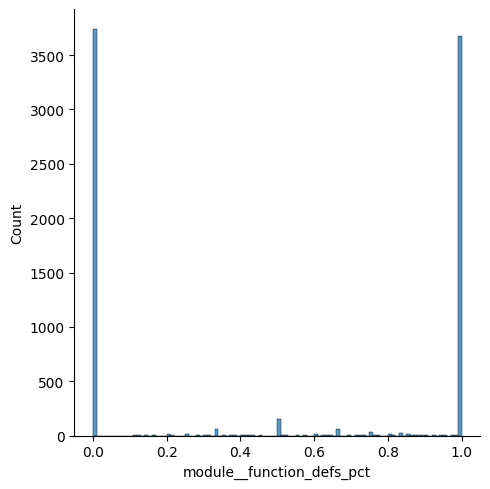

In [50]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

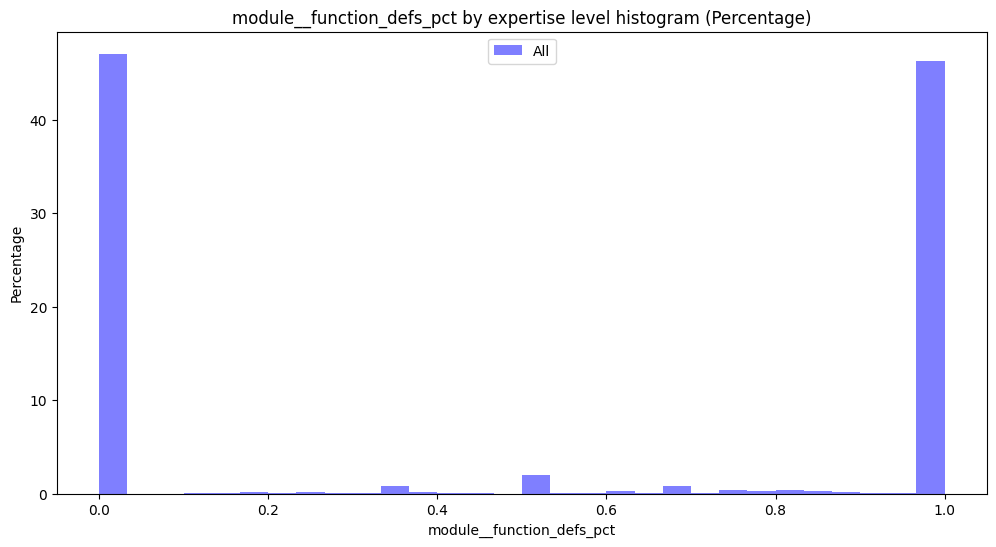

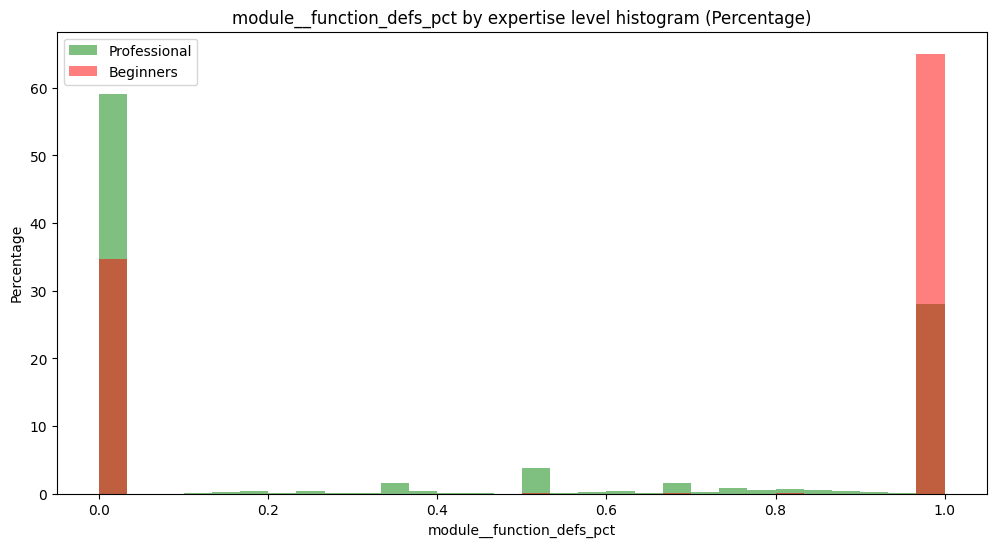

In [51]:
print_histogram(X, 'module__function_defs_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__function_defs_pct', 'module__expertise_level', bins=30, include_all=False)

In [52]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.47290088932739277
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.28659419900254085,10.944987599704582]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un va

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [53]:
X[(X['module__function_defs_pct'] > 0.0) & (X['module__function_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.0,528.000000,528.000000
mean,0.437500,0.102547,0.036700,2.117424,3.628788,0.424999,0.560571,0.014429,4.965064,4.173393,0.388644,0.037879,0.003788,0.009470,0.467803,0.011364,0.507576,0.0,0.020833,0.979167
std,0.496549,0.123942,0.045347,2.136126,5.227145,0.203363,0.199815,0.069360,3.762731,3.163833,0.259668,0.191084,0.061487,0.096942,0.499435,0.106093,0.500417,0.0,0.142962,0.142962
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.111111,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000,0.454545,0.000000,2.600000,2.200000,0.125156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.076923,0.000000,1.000000,2.000000,0.500000,0.500000,0.000000,4.000000,3.666667,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,1.000000,0.153846,0.067857,2.000000,4.000000,0.500000,0.727273,0.000000,6.000000,5.333333,0.600000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,1.000000,0.780822,0.292683,25.000000,59.000000,0.888889,0.980000,0.500000,27.000000,22.555555,0.870968,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable enum_defs_pct (12/13)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 1.0. Su media es 0.003743.

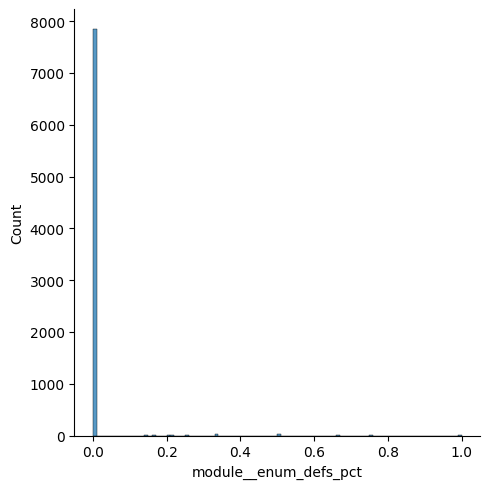

In [54]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

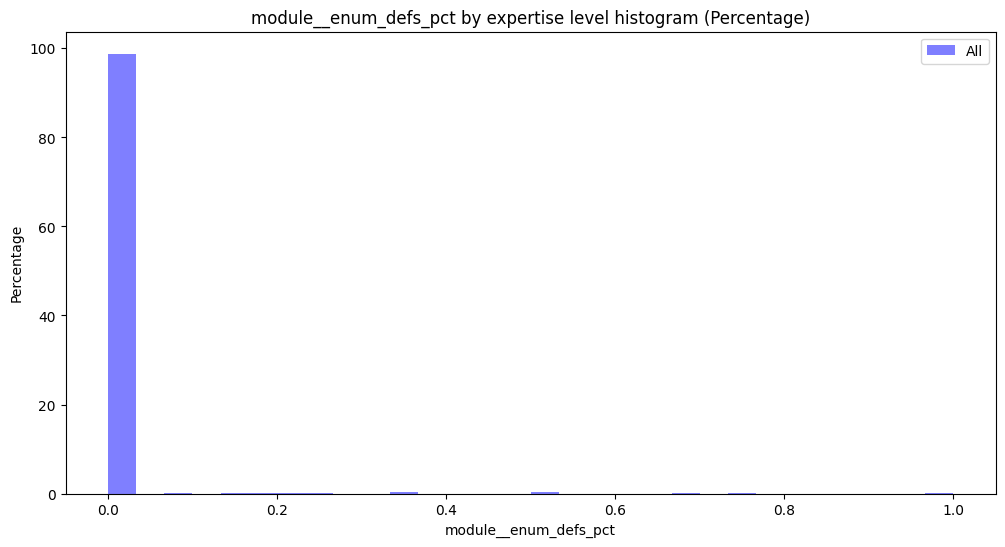

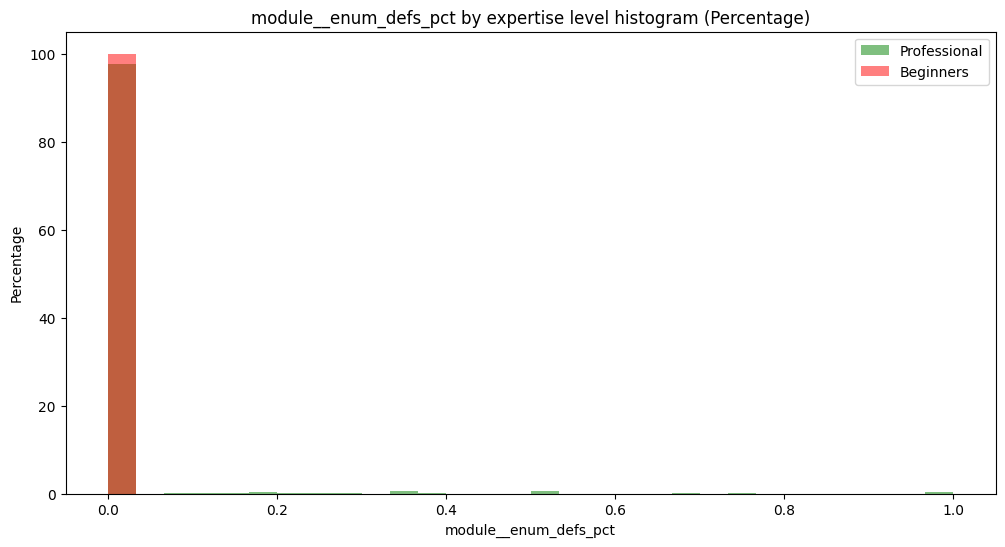

In [55]:
print_histogram(X, 'module__enum_defs_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__enum_defs_pct', 'module__expertise_level', bins=30, include_all=False)

In [56]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9498530948945889
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 97 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 1.222% del total de instancias.
+3.0IQR: 97 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 1.222% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__enum

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [57]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.0,97.0,97.000000,97.0,97.000000,97.0,97.0,97.0
mean,0.505155,0.120554,0.049778,2.134021,1.422680,0.407272,0.135786,0.456942,1.018935,2.905774,0.395935,0.0,0.0,0.0,0.793814,0.0,0.206186,0.0,0.0,1.0
std,0.502571,0.111669,0.081634,2.510930,6.207917,0.286965,0.241626,0.280950,2.223331,2.047175,0.268555,0.0,0.0,0.0,0.406667,0.0,0.406667,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.111111,0.000000,0.250000,0.000000,1.875000,0.008403,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
50%,1.000000,0.100000,0.038462,1.000000,0.000000,0.500000,0.000000,0.333333,0.000000,3.000000,0.482759,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
75%,1.000000,0.200000,0.055556,2.000000,1.000000,0.666667,0.166667,0.500000,1.000000,4.333333,0.613636,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
max,1.000000,0.454545,0.333333,11.000000,59.000000,0.857143,0.921875,1.000000,15.000000,7.952381,0.870968,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0


### Variable type_annotations_pct (13/13)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 1.0. Su media es 0.142791. 

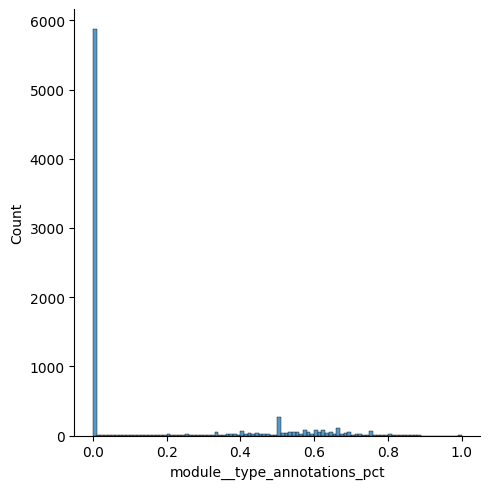

In [58]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

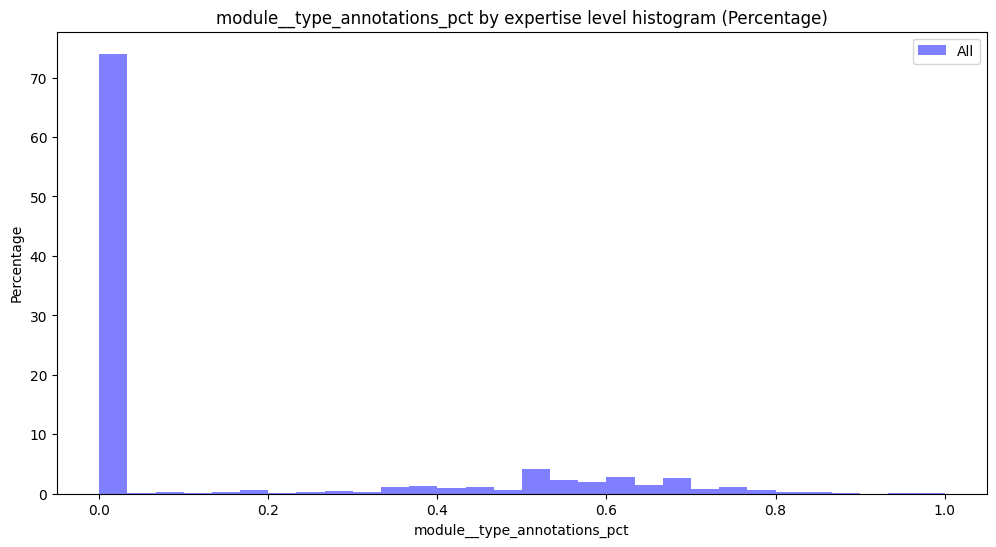

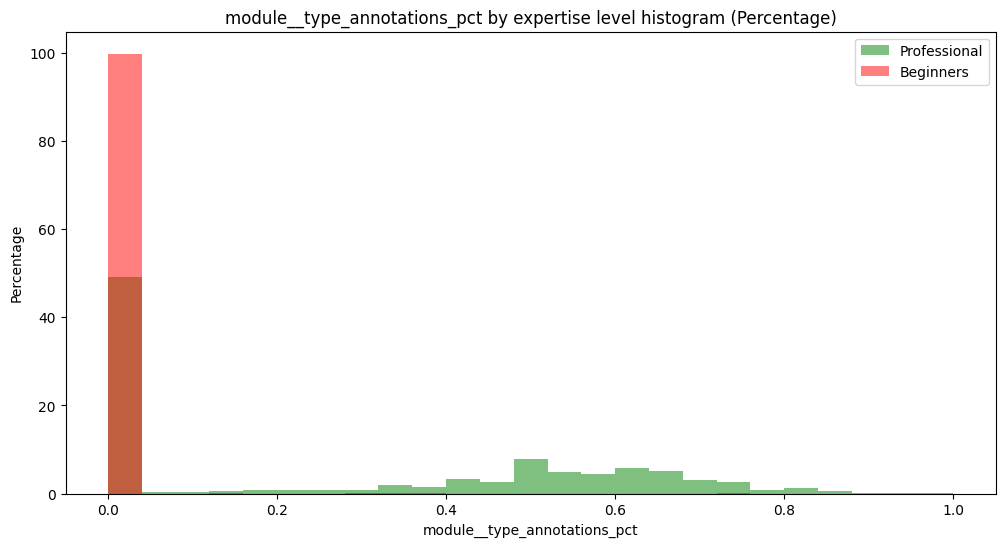

In [59]:
print_histogram(X, 'module__type_annotations_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__type_annotations_pct', 'module__expertise_level', bins=25, include_all=False)

In [60]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6490920644870768
Rango valores atípicos extremos (Tukey): [-0.5454545617103577,0.7272727489471436]
Rango valores atípicos leves (Tukey): [-0.27272728085517883,0.4545454680919647]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.028124753581778274,3.8404355401835004]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.5454545617103577 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.27272728085517883 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1538 instancias tienen un valor para module__type_annotations_pct superior a 0.4545454680919647 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 19.37% del total de instancias.
+3.0IQR: 204 instancias tienen un valor para module__type_annotations_pc

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.72 (Con un MC de 64 usamos Tuckey Extremo)

In [75]:
X[X['module__type_annotations_pct'] > 0.72727274].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_PROFESSIONAL
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0,204.000000,204.0,204.000000,204.0,204.000000,204.000000
mean,0.421569,0.062817,0.049757,0.578431,1.897059,0.427307,0.569487,0.003206,3.814105,2.306873,0.797257,0.024510,0.014706,0.0,0.553922,0.0,0.431373,0.0,0.014706,0.985294
std,0.495025,0.106513,0.066604,0.755098,2.462365,0.478240,0.476265,0.023348,4.225148,3.131912,0.062293,0.155006,0.120669,0.0,0.498307,0.0,0.496486,0.0,0.120669,0.120669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.731092,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.900000,0.000000,0.777778,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,1.000000
75%,1.000000,0.111111,0.100000,1.000000,3.000000,1.000000,1.000000,0.000000,6.312500,4.500000,0.826087,0.000000,0.000000,0.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000
max,1.000000,0.454545,0.200000,6.000000,17.000000,1.000000,1.000000,0.200000,17.600000,17.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000


## Multivariate

Isolation forest algorithm

In [62]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
153,SnakeCase,False,0.218750,0.046875,7,19,0.269231,0.730769,0.000000,2.263158,16.714285,0.000000,False,PROFESSIONAL
397,Lower,True,0.103448,0.017241,5,31,0.138889,0.861111,0.000000,5.838710,3.681818,0.000000,False,PROFESSIONAL
400,Lower,False,0.141593,0.008850,4,59,0.062500,0.921875,0.015625,1.762712,7.250000,0.008403,False,PROFESSIONAL
2390,SnakeCase,True,0.083333,0.083333,6,0,1.000000,0.000000,0.000000,0.000000,2.230769,0.738462,True,PROFESSIONAL
2867,SnakeCase,True,0.163265,0.020408,8,21,0.275862,0.724138,0.000000,2.714286,1.833333,0.535088,False,PROFESSIONAL
5311,Lower,True,0.090909,0.090909,1,0,1.000000,0.000000,0.000000,0.000000,13.714286,0.000000,True,BEGINNER
5360,Lower,True,0.090909,0.090909,1,0,1.000000,0.000000,0.000000,0.000000,13.714286,0.000000,True,BEGINNER
5871,CamelUp,False,0.142857,0.000000,1,0,1.000000,0.000000,0.000000,0.000000,19.750000,0.000000,True,BEGINNER
7271,CamelUp,False,0.074074,0.000000,11,12,0.478261,0.521739,0.000000,24.833334,0.000000,0.000000,True,BEGINNER
7434,CamelUp,False,0.074074,0.000000,11,12,0.478261,0.521739,0.000000,24.833334,0.000000,0.000000,True,BEGINNER


### IMPORTANTE
Analizar los 22 resultados obtenidos.

In [63]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,10.0,0.500000,0.527046,0.000000,0.000000,0.500000,1.000000,1.000000
module__global_stmts_pct,10.0,0.118321,0.047274,0.074074,0.085227,0.097179,0.142541,0.218750
module__global_expressions_pct,10.0,0.035853,0.038885,0.000000,0.002212,0.018825,0.074219,0.090909
module__number_of_classes,10.0,5.500000,3.836955,1.000000,1.750000,5.500000,7.750000,11.000000
module__number_of_functions,10.0,15.400000,18.739145,0.000000,0.000000,12.000000,20.500000,59.000000
module__class_defs_pct,10.0,0.570300,0.391127,0.062500,0.270889,0.478261,1.000000,1.000000
module__function_defs_pct,10.0,0.428137,0.388898,0.000000,0.000000,0.521739,0.729111,0.921875
module__enum_defs_pct,10.0,0.001563,0.004941,0.000000,0.000000,0.000000,0.000000,0.015625
module__average_stmts_function_body,10.0,6.224554,9.975666,0.000000,0.000000,2.012935,5.057604,24.833334
module__average_stmts_method_body,10.0,7.888878,7.436434,0.000000,1.932692,5.465909,13.714286,19.750000


In [64]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,7929.0,0.174801,0.379821,0.0,0.0,0.000000,0.000000,1.0
module__global_stmts_pct,7929.0,0.274318,0.311701,0.0,0.0,0.157895,0.500000,1.0
module__global_expressions_pct,7929.0,0.111684,0.183500,0.0,0.0,0.000000,0.166667,1.0
module__number_of_classes,7929.0,0.405095,1.049893,0.0,0.0,0.000000,0.000000,25.0
module__number_of_functions,7929.0,1.845125,3.884330,0.0,0.0,1.000000,2.000000,57.0
module__class_defs_pct,7929.0,0.207213,0.386591,0.0,0.0,0.000000,0.000000,1.0
module__function_defs_pct,7929.0,0.500151,0.486227,0.0,0.0,0.500000,1.000000,1.0
module__enum_defs_pct,7929.0,0.005588,0.058985,0.0,0.0,0.000000,0.000000,1.0
module__average_stmts_function_body,7929.0,2.753734,3.953115,0.0,0.0,1.833333,4.416667,43.0
module__average_stmts_method_body,7929.0,0.983220,2.133805,0.0,0.0,0.000000,0.000000,28.0
